# Tessaract OCR Output



In [ ]:
!pip install pytesseract
!pip install Pillow


In [ ]:
!pip install pytorch_lightning
!pip install pytesseract
!pip install --upgrade --force-reinstall --no-deps albumentations
!sudo apt install tesseract-ocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.3.1
    Uninstalling albumentations-1.3.1:
      Successfully uninstalled albumentations-1.3.1
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Ge

In [ ]:
# Mount Google Drive if you have your images stored there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pytesseract
from PIL import Image

# Install the required libraries
!pip install pytesseract
!pip install Pillow

# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

def extract_text_from_image(image_path):
    image = Image.open(image_path)
    extracted_text = pytesseract.image_to_string(image)
    return extracted_text

# Replace 'image_path.png' with the actual path to your image on Google Drive
image_path = '/content/drive/MyDrive/SPECTRUM/Prime Bank Data/3_d.jpg'
extracted_text = extract_text_from_image(image_path)

print("Extracted Text:")
print(extracted_text)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracted Text:
33 HS Code..-

62071106 - 1 000

ja 8
38 Net ee (kg)
wore [20

 



# Pytesseract Bounding Box & Sorting


In [ ]:
!pip install pytesseract
!pip install Pillow

In [ ]:
!pip install pytorch_lightning
!pip install pytesseract
!pip install --upgrade --force-reinstall --no-deps albumentations
!sudo apt install tesseract-ocr


  Using cached albumentations-1.3.1-py3-none-any.whl (125 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.3.1
    Uninstalling albumentations-1.3.1:
      Successfully uninstalled albumentations-1.3.1
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install pillow

import pytesseract
from PIL import Image

# Path to Tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

def get_word_bounding_boxes(image_path):
    # Load the image
    image = Image.open(image_path)

    # Perform OCR on the image
    ocr_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

    # Extract bounding box information for each word
    word_bounding_boxes = []
    for i, word in enumerate(ocr_data['text']):
        if word:
            left = ocr_data['left'][i]
            top = ocr_data['top'][i]
            width = ocr_data['width'][i]
            height = ocr_data['height'][i]
            word_bounding_boxes.append((word, (left, top, left + width, top + height)))

    return word_bounding_boxes

# Provide the correct file path for your image
image_path = '/content/drive/MyDrive/SPECTRUM/Prime Bank Data/3_d.jpg'
word_bounding_boxes = get_word_bounding_boxes(image_path)

# Print the word and its bounding box for each word
for word, bounding_box in word_bounding_boxes:
    print(f"Word: {word}, Bounding Box: {bounding_box}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Word: 33, Bounding Box: (6, 0, 26, 18)
Word: HS, Bounding Box: (29, 0, 48, 18)
Word: Code..-, Bounding Box: (45, 0, 100, 30)
Word: 62071106, Bounding Box: (8, 15, 90, 58)
Word: -, Bounding Box: (90, 15, 98, 58)
Word: 1, Bounding Box: (99, 9, 141, 44)
Word: 000, Bounding Box: (152, 32, 183, 47)
Word: ja, Bounding Box: (0, 89, 13, 117)
Word: 8, Bounding Box: (25, 92, 70, 125)
Word: 38, Bounding Box: (152, 122, 167, 133)
Word: Net, Bounding Box: (172, 122, 195, 132)
Word: ee, Bounding Box: (212, 119, 252, 157)
Word: (kg), Bounding Box: (248, 120, 275, 135)
Word: wore, Bounding Box: (9, 148, 50, 164)
Word: [20, Bounding Box: (92, 148, 124, 163)


In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install pillow

import pytesseract
from PIL import Image

# Path to Tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

def sort_bounding_boxes(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda box: (box[1][1], box[1][0]))
    return sorted_boxes

def get_word_bounding_boxes(image_path):
    # Load the image
    image = Image.open(image_path)

    # Perform OCR on the image
    ocr_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

    # Extract bounding box information for each word
    word_bounding_boxes = []
    for i, word in enumerate(ocr_data['text']):
        if word:
            left = ocr_data['left'][i]
            top = ocr_data['top'][i]
            width = ocr_data['width'][i]
            height = ocr_data['height'][i]
            word_bounding_boxes.append((word, (left, top, left + width, top + height)))

    # Sort words by line and position
    sorted_word_bounding_boxes = sort_bounding_boxes(word_bounding_boxes)

    return sorted_word_bounding_boxes

# Provide the correct file path for your image
image_path = '/content/drive/MyDrive/SPECTRUM/Prime Bank Data/3_d.jpg'
sorted_word_bounding_boxes = get_word_bounding_boxes(image_path)

# Group words by line and print the sorted lines
current_line = sorted_word_bounding_boxes[0][1][1]
current_line_words = []
for word, bounding_box in sorted_word_bounding_boxes:
    if bounding_box[1] != current_line:
        print(" ".join(current_line_words))
        current_line_words = []
        current_line = bounding_box[1]
    current_line_words.append(word)

# Print the last line
print(" ".join(current_line_words))


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
33 HS Code..-
1
62071106 -
000
ja
8
ee
(kg)
38 Net
wore [20


 # Easy OCR

In [1]:
! pip install easyocr
import easyocr
import cv2
import matplotlib.pyplot as plt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.9 MB/s eta 0:00:00


In [2]:
reader = easyocr.Reader(['en'])
result = reader.readtext('/content/drive/MyDrive/SPECTRUM/Prime Bank Data/3_b.jpg')
print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[221, 73], [441, 73], [441, 93], [221, 93]], 'Opfice OF DispatchieXPORT', 0.14173037176402223), ([[65, 103], [178, 103], [178, 128], [65, 128]], 'DECLARATON', 0.6501664770829825), ([[204, 108], [242, 108], [242, 132], [204, 132]], '1301', 0.409340500831604), ([[13, 147], [41, 147], [41, 167], [13, 167]], 'EX', 0.43446629272119147), ([[204, 139], [447, 139], [447, 166], [204, 166]], 'Custom House, Chattogram', 0.7232367724145035), ([[204, 166], [294, 166], [294, 190], [204, 190]], 'Reglatratlon', 0.728793492171645), ([[119, 199], [147, 199], [147, 217], [119, 217]], 'NIA', 0.9882262615381067), ([[205, 193], [223, 193], [223, 215], [205, 215]], 'c', 0.35846579802427314), ([[239, 189], [310, 189], [310, 216], [239, 216]], '620210', 0.9944618777317623), ([[392, 187], [494, 187], [494, 211], [392, 211]], '15/04/2023', 0.9998771778545054), ([[205, 227], [269, 227], [269, 245], [205, 245]], 'Manlfest', 0.45556001

In [3]:
for x in result:
    text = x[1]
    bbox = x[0]
    print("Text:", text)
    print("Bounding Box:", bbox)
    print()


Text: Opfice OF DispatchieXPORT
Bounding Box: [[221, 73], [441, 73], [441, 93], [221, 93]]

Text: DECLARATON
Bounding Box: [[65, 103], [178, 103], [178, 128], [65, 128]]

Text: 1301
Bounding Box: [[204, 108], [242, 108], [242, 132], [204, 132]]

Text: EX
Bounding Box: [[13, 147], [41, 147], [41, 167], [13, 167]]

Text: Custom House, Chattogram
Bounding Box: [[204, 139], [447, 139], [447, 166], [204, 166]]

Text: Reglatratlon
Bounding Box: [[204, 166], [294, 166], [294, 190], [204, 190]]

Text: NIA
Bounding Box: [[119, 199], [147, 199], [147, 217], [119, 217]]

Text: c
Bounding Box: [[205, 193], [223, 193], [223, 215], [205, 215]]

Text: 620210
Bounding Box: [[239, 189], [310, 189], [310, 216], [239, 216]]

Text: 15/04/2023
Bounding Box: [[392, 187], [494, 187], [494, 211], [392, 211]]

Text: Manlfest
Bounding Box: [[205, 227], [269, 227], [269, 245], [205, 245]]

Text: Itema
Bounding Box: [[19, 255], [59, 255], [59, 269], [19, 269]]

Text: Tot pock
Bounding Box: [[119, 253], [183, 253]

In [4]:
# Sort the OCR results based on the y-coordinate and then the x-coordinate of the bounding box
sorted_results = sorted(result, key=lambda r: (r[0][0][1], r[0][0][0]))

# Group texts from the same line together
lines = []
current_line = []
previous_y = sorted_results[0][0][0][1]
for bbox, text, confidence in sorted_results:
    x, y = bbox[0]
    if y - previous_y > 10:  # Adjust the threshold value as needed
        current_line = sorted(current_line, key=lambda c: c[0])  # Sort texts in current line from left to right
        lines.append(' '.join([t[1] for t in current_line]))
        current_line = []
    current_line.append((x, text))
    previous_y = y

# Sort the texts in the last line
current_line = sorted(current_line, key=lambda c: c[0])

# Join the sorted words in each line with a space
lines.append(' '.join([t[1] for t in current_line]))

# Print the extracted lines
for line in lines:
    print(line)


Opfice OF DispatchieXPORT
DECLARATON 1301
EX Custom House, Chattogram
Reglatratlon
Pedr, NIA c 620210 15/04/2023
Manlfest
Itema Tot pock 7 Agent Reltrnce
148.00 2023 #5970
NIA BIN:
lto NIA NIA 1J NIA
Its Country ofexport 15 CE 17 CD: Code
Bangladesh BQL JMX
16 Country of orlgln 17 Country ol deellnalion
IBangladesh Mexico
20 Dellvary tens
IFCA
22 Currency Total Involced Valua EJ Erch: rale 24 Natura pf .
JUSD I15,452.88 1106.8400 b iranbac
ke Flnanclol and bankIng data Bank 024
Branch 00001546 Lc No SGL10379
Bank Nama Prime Barik Ltd:
Sector & Fund 043 "Garments Credit


In [5]:
for x in result:
    text = x[1]

    print("Text:", text)
    bbox = x[0]    # Extract the bounding box coordinates from the result
    x1, y1 = bbox[0]  # Extract the top-left coordinates (x1, y1)
    print("Top-left Coordinates:", (x1, y1))  # Print the top-left coordinates


Text: Opfice OF DispatchieXPORT
Top-left Coordinates: (221, 73)
Text: DECLARATON
Top-left Coordinates: (65, 103)
Text: 1301
Top-left Coordinates: (204, 108)
Text: EX
Top-left Coordinates: (13, 147)
Text: Custom House, Chattogram
Top-left Coordinates: (204, 139)
Text: Reglatratlon
Top-left Coordinates: (204, 166)
Text: NIA
Top-left Coordinates: (119, 199)
Text: c
Top-left Coordinates: (205, 193)
Text: 620210
Top-left Coordinates: (239, 189)
Text: 15/04/2023
Top-left Coordinates: (392, 187)
Text: Manlfest
Top-left Coordinates: (205, 227)
Text: Itema
Top-left Coordinates: (19, 255)
Text: Tot pock
Top-left Coordinates: (119, 253)
Text: 7 Agent Reltrnce
Top-left Coordinates: (239, 249)
Text: 148.00
Top-left Coordinates: (106, 274)
Text: 2023
Top-left Coordinates: (236, 272)
Text: #5970
Top-left Coordinates: (342, 270)
Text: BIN:
Top-left Coordinates: (251, 319)
Text: NIA
Top-left Coordinates: (19, 327)
Text: lto NIA
Top-left Coordinates: (5, 425)
Text: NIA
Top-left Coordinates: (141, 427)
T

#Vertically bottom value finder

without similarity checking

In [ ]:
def find_value(key_text, result):
    key_bbox = None
    key_x, key_y = None, None

    # Find the bounding box of the key text
    for bbox, text, _ in result:
        if text == key_text:
            key_bbox = bbox
            key_x, key_y = bbox[0]

    if key_bbox is None:
        return "Key text not found"

    min_y_diff = float('inf')
    matching_value = None

    # Find the value text that shares a similar X-value and is positioned below the key text
    for bbox, text, _ in result:
        x, y = bbox[0]
        y_diff = abs(y - key_y)

        # Check if the X-value is similar, Y-difference is small, and the value is below the key
        if abs(x - key_x) <= 2 and y_diff < min_y_diff and text != key_text and y > key_y:
            min_y_diff = y_diff
            matching_value = text

    return matching_value

# Example usage
key_text = "20 Dellvary tens"
value_text = find_value(key_text, result)
print("Key Text:", key_text)
print("Matching Value Text:", value_text)


Similarity checking using Edit Distance

In [6]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.2 MB/s eta 0:00:00


In [ ]:
import Levenshtein  # Import the Levenshtein package

def find_value(key_text, result):
    key_bbox = None
    key_x, key_y = None, None

    # Find the bounding box of the most similar key text using edit distance
    min_edit_distance = float('inf')
    most_similar_key = None

    for bbox, text, _ in result:
        edit_distance = Levenshtein.distance(key_text, text)

        if edit_distance < min_edit_distance:
            min_edit_distance = edit_distance
            most_similar_key = text

    if most_similar_key is None:
        return "Key text not found"

    # Find the bounding box of the most similar key text
    for bbox, text, _ in result:
        if text == most_similar_key:
            key_bbox = bbox
            key_x, key_y = bbox[0]

    min_y_diff = float('inf')
    matching_value = None

    # Find the value text that shares a similar X-value and has a small Y-difference
    for bbox, text, _ in result:
        x, y = bbox[0]
        y_diff = abs(y - key_y)

        # Check if the X-value is similar and Y-difference is small
        if abs(x - key_x) <= 2 and y_diff < min_y_diff and text != most_similar_key and y > key_y:
            min_y_diff = y_diff
            matching_value = text

    return matching_value

# Example usage
key_text = "20 Delivery terms"  # Actual key text
value_text = find_value(key_text, result)
print("Key Text:", key_text)
print("Matching Value Text:", value_text)


making a function like wrapper

In [8]:
import Levenshtein  # Import the Levenshtein package

def vertically_bottom_value_finder(key_text, result):
    key_bbox = None
    key_x, key_y = None, None

    # Find the bounding box of the most similar key text using edit distance
    min_edit_distance = float('inf')
    most_similar_key = None

    for bbox, text, _ in result:
        edit_distance = Levenshtein.distance(key_text, text)

        if edit_distance < min_edit_distance:
            min_edit_distance = edit_distance
            most_similar_key = text

    if most_similar_key is None:
        return "Key text not found"

    # Find the bounding box of the most similar key text
    for bbox, text, _ in result:
        if text == most_similar_key:
            key_bbox = bbox
            key_x, key_y = bbox[0]

    min_y_diff = float('inf')
    matching_value = None

    # Find the value text that shares a similar X-value and has a small Y-difference
    for bbox, text, _ in result:
        x, y = bbox[0]
        y_diff = abs(y - key_y)

        # Check if the X-value is similar and Y-difference is small
        if abs(x - key_x) <= 2 and y_diff < min_y_diff and text != most_similar_key and y > key_y:
            min_y_diff = y_diff
            matching_value = text

    return matching_value

# Example usage
key_text = "20 Delivery Terms"  # Actual key text
value_text = vertically_bottom_value_finder(key_text, result)
print("Key Text:", key_text)
print("Matching Value Text:", value_text)


Key Text: 20 Delivery Terms
Matching Value Text: IFCA


# Similarity checking using Fuzzywizzy

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz  # Import the fuzz function from the fuzzywuzzy module

def find_value(key_text, result):
    key_bbox = None
    key_x, key_y = None, None

    # Find the bounding box of the most similar key text using fuzzy string matching
    max_similarity = 0
    most_similar_key = None

    for bbox, text, _ in result:
        similarity = fuzz.partial_ratio(key_text, text)

        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_key = text

    if most_similar_key is None:
        return "Key text not found"

    # Find the bounding box of the most similar key text
    for bbox, text, _ in result:
        if text == most_similar_key:
            key_bbox = bbox
            key_x, key_y = bbox[0]

    min_y_diff = float('inf')
    matching_value = None

    # Find the value text that shares a similar X-value and has a small Y-difference
    for bbox, text, _ in result:
        x, y = bbox[0]
        y_diff = abs(y - key_y)

        # Check if the X-value is similar and Y-difference is small
        if abs(x - key_x) <= 2 and y_diff < min_y_diff and text != most_similar_key:
            min_y_diff = y_diff
            matching_value = text

    return matching_value

# Example usage
key_text = "32 HS Code"  # Actual key text
value_text = find_value(key_text, result)
print("Key Text:", key_text)
print("Matching Value Text:", value_text)


Key Text: 33 HS Code
Matching Value Text: 62071100


#Horizontally aligned key-value pairs

In [11]:
def find_value_with_pattern(key_text, result):
    key_bbox = None
    key_x, key_y = None, None

    # Find the bounding box of the key text
    for bbox, text, _ in result:
        if text == key_text:
            key_bbox = bbox
            key_x, key_y = bbox[0]

    if key_bbox is None:
        return "Key text not found"

    # Find the value text that matches the Y-value pattern
    matching_value = None

    for bbox, text, _ in result:
        x, y = bbox[0]

        # Check if the X-value is greater and the Y-values are close
        if x > key_x and abs(y - key_y) < 10 and text != key_text:
            matching_value = text
            break

    return matching_value

# Example usage
key_text = "Lc No"  # Actual key text
value_text = find_value_with_pattern(key_text, result)
print("Key Text:", key_text)
print("Matching Value Text:", value_text)


Key Text: Lc No
Matching Value Text: SGL10379


with similarity checking

In [12]:
import Levenshtein  # Import the Levenshtein package

def find_value_with_pattern_and_similarity(key_text, result):
    key_bbox = None
    key_x, key_y = None, None

    # Find the most similar key text using edit distance
    min_edit_distance = float('inf')
    most_similar_key = None

    for bbox, text, _ in result:
        edit_distance = Levenshtein.distance(key_text, text)

        if edit_distance < min_edit_distance:
            min_edit_distance = edit_distance
            most_similar_key = text

    if most_similar_key is None:
        return "Key text not found"

    # Find the bounding box of the most similar key text
    for bbox, text, _ in result:
        if text == most_similar_key:
            key_bbox = bbox
            key_x, key_y = bbox[0]

    # Find the value text that matches the Y-value pattern
    matching_value = None

    for bbox, text, _ in result:
        x, y = bbox[0]

        # Check if the X-value is greater, Y-values are close, and it's not the key text
        if text != most_similar_key and x > key_x and abs(y - key_y) < 10:
            matching_value = text
            break

    return matching_value

# Example usage
key_text = "Lc No"  # Actual key text
value_text = find_value_with_pattern_and_similarity(key_text, result)
print("Key Text:", key_text)
print("Matching Value Text:", value_text)


Key Text: Lc No
Matching Value Text: SGL10379


# Merging Vertically bottom Value finder & Horizontally Aligned Value Finder

In [13]:
import Levenshtein  # Import the Levenshtein package

def vertically_bottom_value_finder(key_text, result):
    key_bbox = None
    key_x, key_y = None, None

    # Find the bounding box of the most similar key text using edit distance
    min_edit_distance = float('inf')
    most_similar_key = None

    for bbox, text, _ in result:
        edit_distance = Levenshtein.distance(key_text, text)

        if edit_distance < min_edit_distance:
            min_edit_distance = edit_distance
            most_similar_key = text

    if most_similar_key is None:
        return None

    # Find the bounding box of the most similar key text
    for bbox, text, _ in result:
        if text == most_similar_key:
            key_bbox = bbox
            key_x, key_y = bbox[0]

    min_y_diff = float('inf')
    matching_value = None

    # Find the value text that shares a similar X-value and has a small Y-difference
    for bbox, text, _ in result:
        x, y = bbox[0]
        y_diff = abs(y - key_y)

        # Check if the X-value is similar and Y-difference is small
        if abs(x - key_x) <= 2 and y_diff < min_y_diff and text != most_similar_key and y > key_y:
            min_y_diff = y_diff
            matching_value = text

    return matching_value

def find_value_with_pattern_and_similarity(key_text, result):
    key_bbox = None
    key_x, key_y = None, None

    # Find the most similar key text using edit distance
    min_edit_distance = float('inf')
    most_similar_key = None

    for bbox, text, _ in result:
        edit_distance = Levenshtein.distance(key_text, text)

        if edit_distance < min_edit_distance:
            min_edit_distance = edit_distance
            most_similar_key = text

    if most_similar_key is None:
        return None

    # Find the bounding box of the most similar key text
    for bbox, text, _ in result:
        if text == most_similar_key:
            key_bbox = bbox
            key_x, key_y = bbox[0]

    # Find the value text that matches the Y-value pattern
    matching_value = None

    for bbox, text, _ in result:
        x, y = bbox[0]

        # Check if the X-value is greater, Y-values are close, and it's not the key text
        if text != most_similar_key and x > key_x and abs(y - key_y) < 10:
            matching_value = text
            break

    return matching_value

def find_value_with_fallback(key_text, result):
    vertically_bottom_value = vertically_bottom_value_finder(key_text, result)
    if vertically_bottom_value:
        return vertically_bottom_value

    horizontally_aligned_value = find_value_with_pattern_and_similarity(key_text, result)
    return horizontally_aligned_value

# Example usage
key_text = "Lc No"  # Actual key text
value_text = find_value_with_fallback(key_text, result)
print("Key Text:", key_text)
print("Matching Value Text:", value_text)


Key Text: Lc No
Matching Value Text: SGL10379


# Line Segment


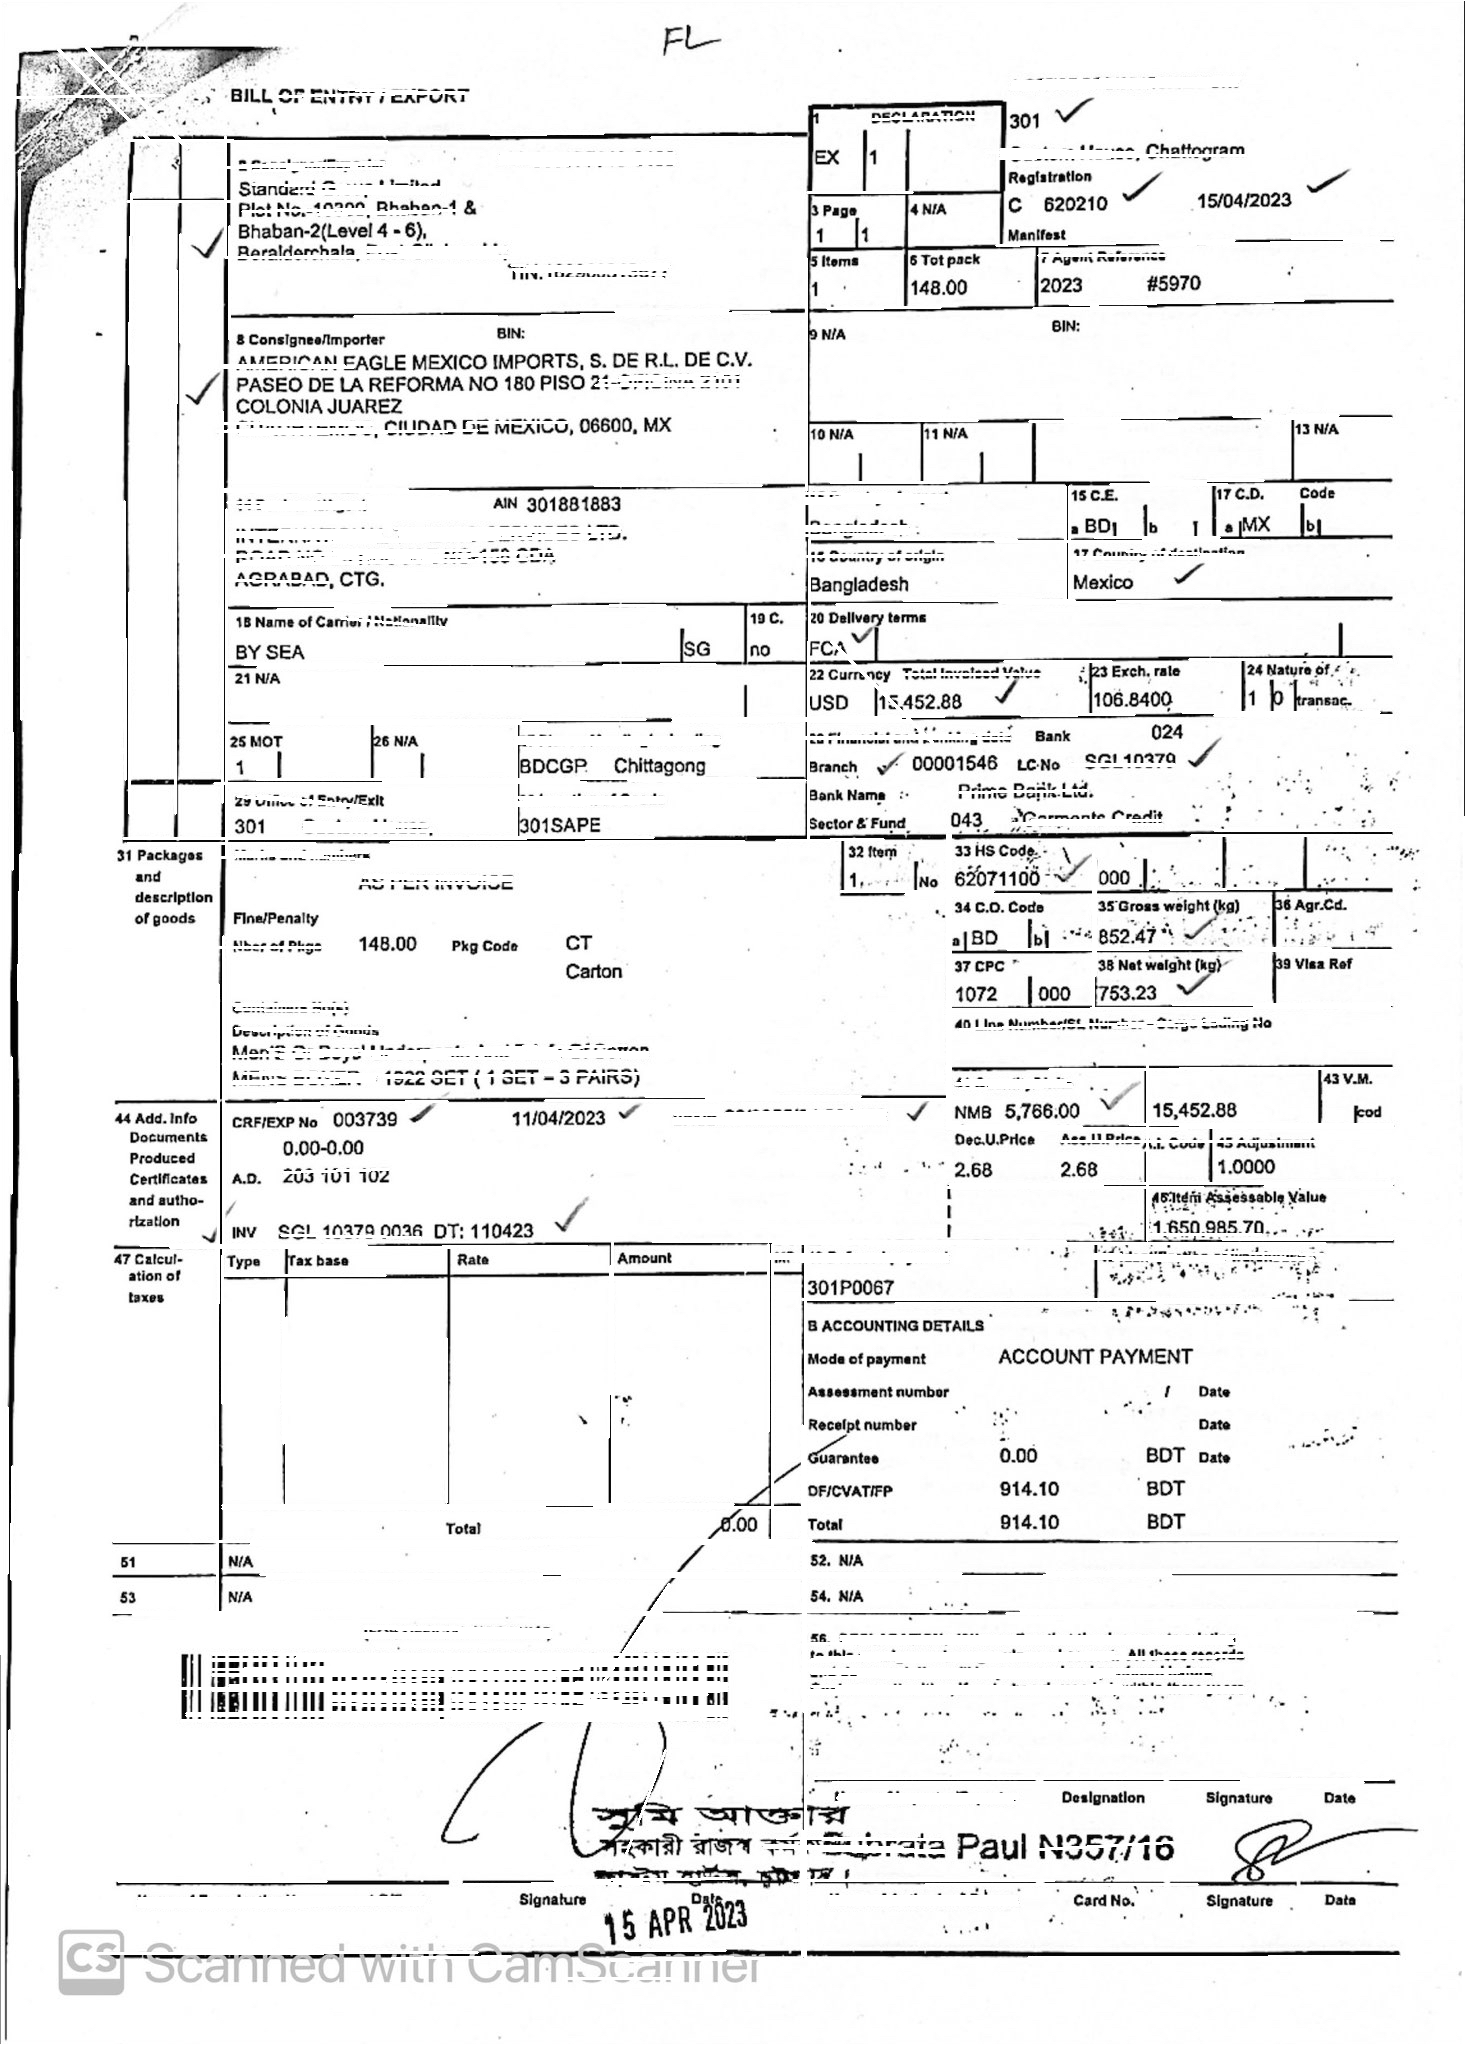

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/drive/MyDrive/SPECTRUM/Prime Bank Data/3.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply edge detection
edges = cv2.Canny(image, threshold1=50, threshold2=150)

# Detect lines using Hough line transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Sort lines by their thickness
lines = sorted(lines, key=lambda line: line[0][3] - line[0][1], reverse=True)

# Draw the detected lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the image with detected lines
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


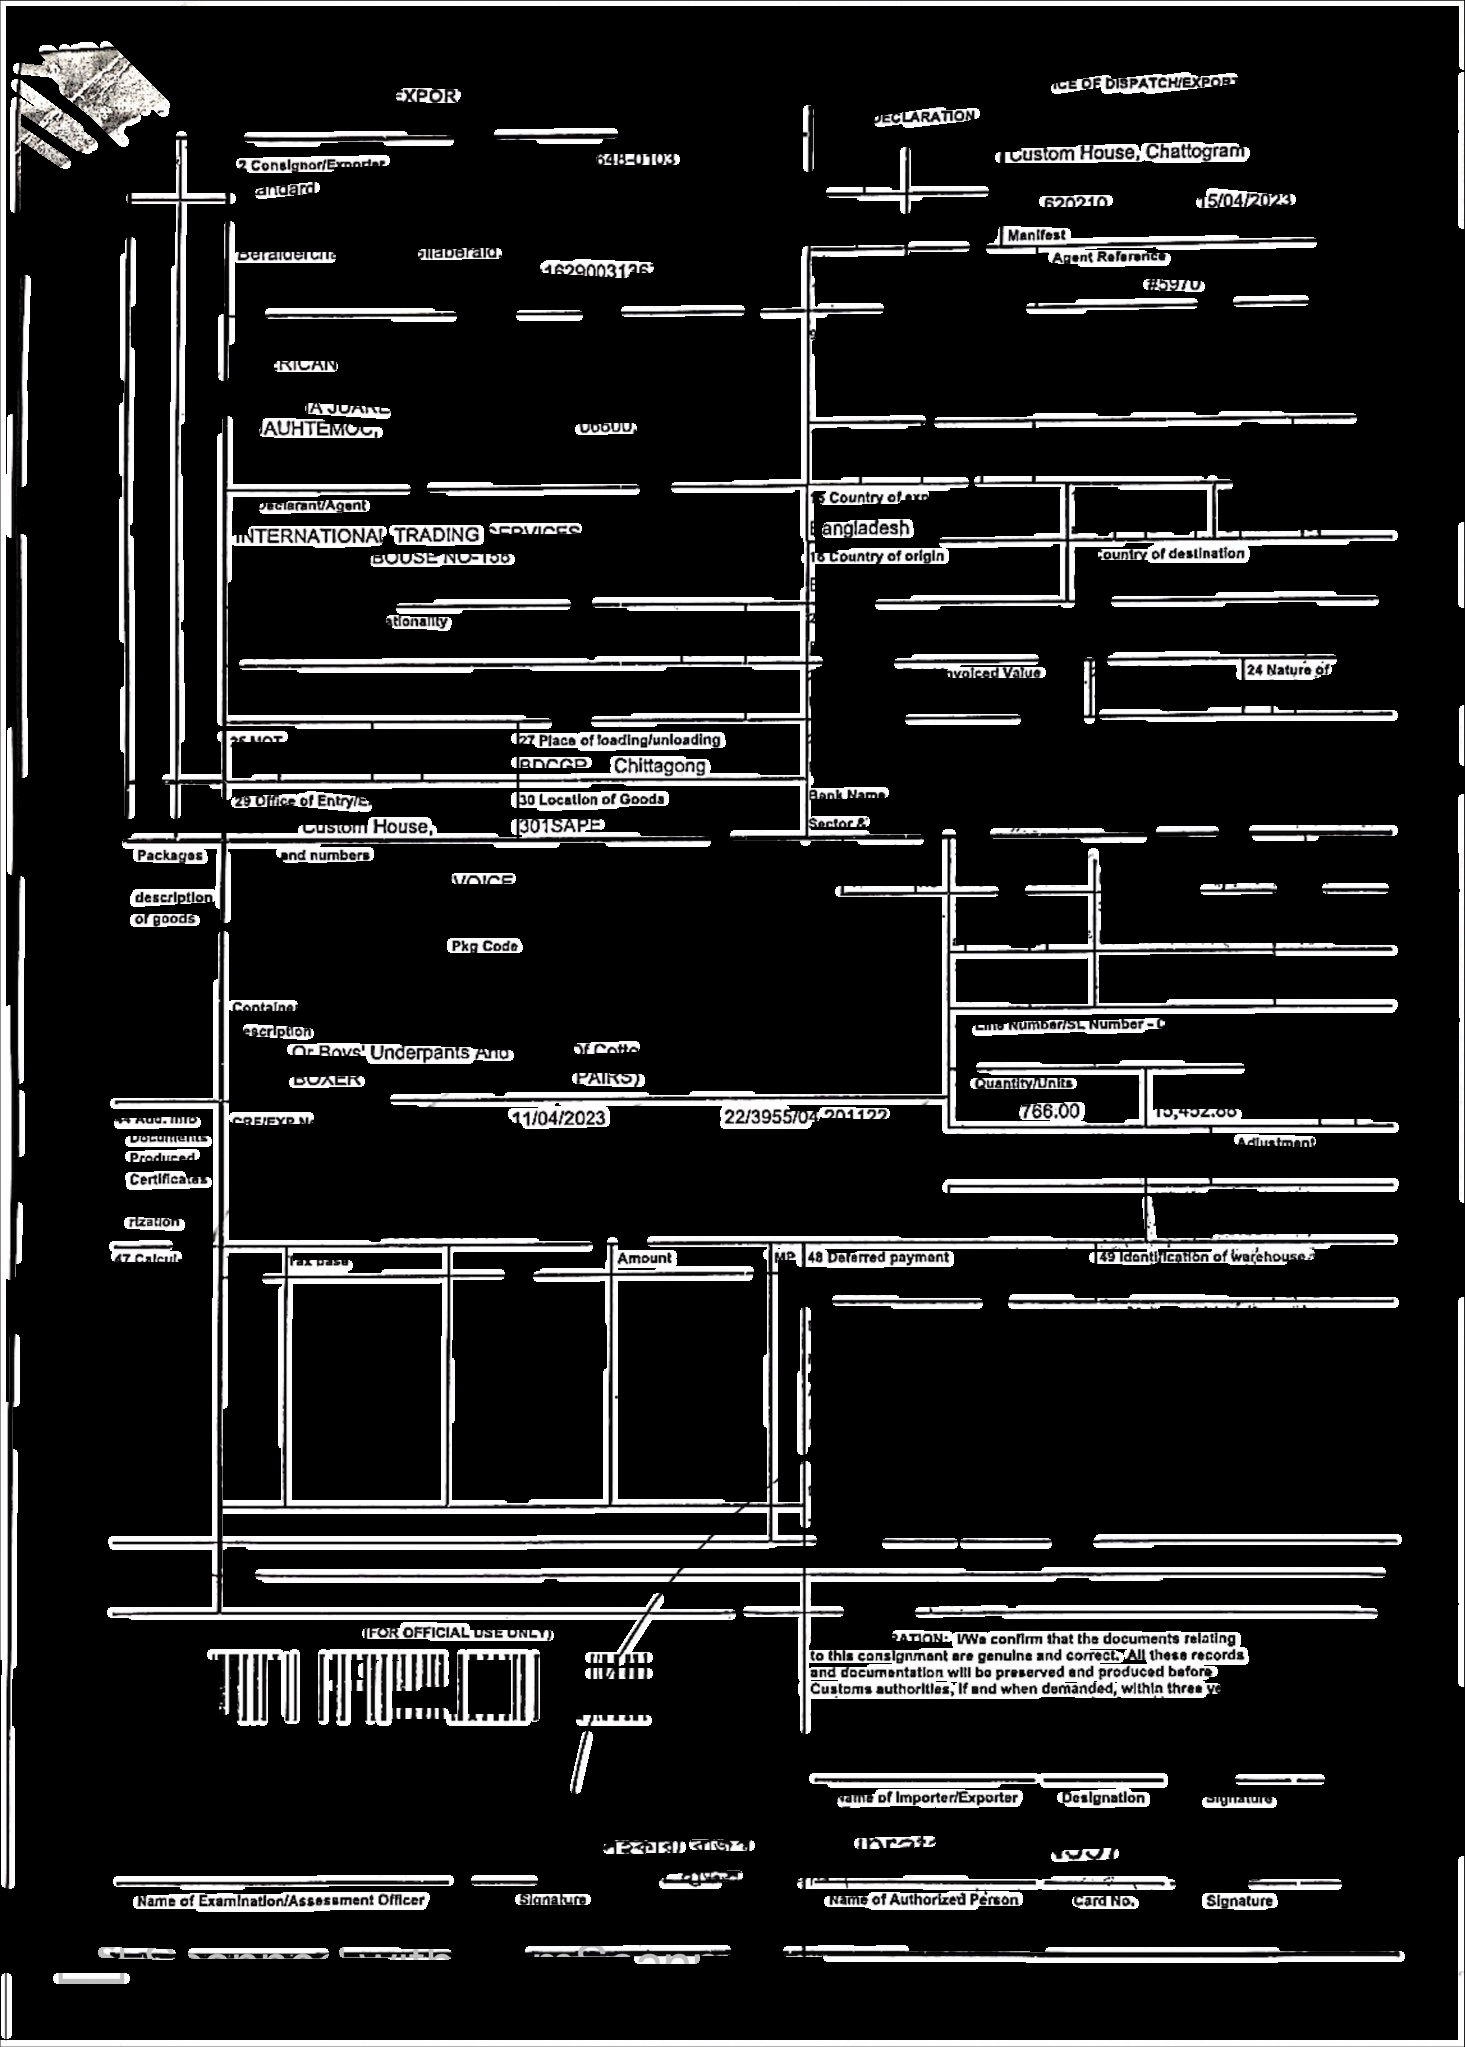

In [19]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/drive/MyDrive/SPECTRUM/Prime Bank Data/3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, threshold1=50, threshold2=150)

# Perform Hough Line Transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=100, minLineLength=50, maxLineGap=5)

# Create a mask for each line
line_masks = np.zeros_like(image)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_masks, (x1, y1), (x2, y2), (255, 255, 255), thickness=5)

# Dilate the lines to connect segments
kernel = np.ones((5, 5), np.uint8)
dilated_lines = cv2.dilate(line_masks, kernel, iterations=1)

# Apply masks to original image
segmented_image = cv2.bitwise_and(image, dilated_lines)

# Display or save the segmented image
cv2.imshow('Segmented Image', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
